# AutoData

<img src="logo_autodata.png" alt="drawing" width="200"/>

<center><h2> Process, visualize and use data easily.</h2></center>

In [1]:
import autodata as ad
%load_ext autoreload
%autoreload 2

# Read data

Easily load CSV, AutoML or pd.DataFrame

In [2]:
input_file = 'data/adult.csv'
data = ad.read_csv(input_file, sep=None, engine='python')

AutoData is a subclass of pd.DataFrame

In [3]:
data.get_data('header')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Set the target variable if needed

In [4]:
data.set_class(['age', 'fnlwgt']) #['income', 'gender']
#data.train_test_split(test_size=0.3)

Get a subset of data

In [5]:
#data.get_data('X_header')
data.get_data('categorical_header')
#data.get_data('y_test')
#data.get_data('numerical_header')

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Processings


Parameters: **method** and **targeted** set (key).

**Missing values imputation**

In [6]:
data = data.imputation()

**Encoding**

In [7]:
data = data.encoding('label', 'categorical')

**Normalization**

In [8]:
data = data.normalization('min-max', 'numerical')

# Visualization

y set plot
TODO: class coloration


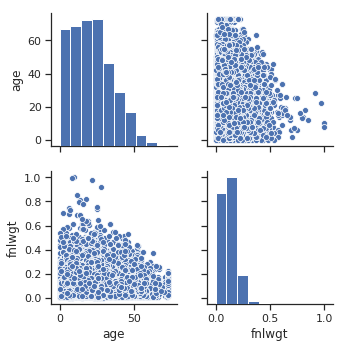

In [9]:
data.plot('y')

TODO: class coloration


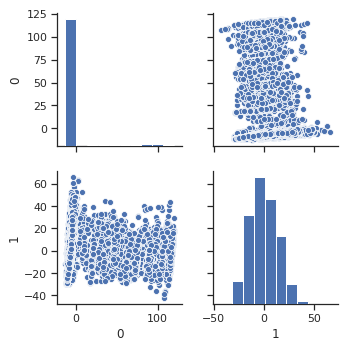

In [10]:
data.pca(n_components=2).plot()

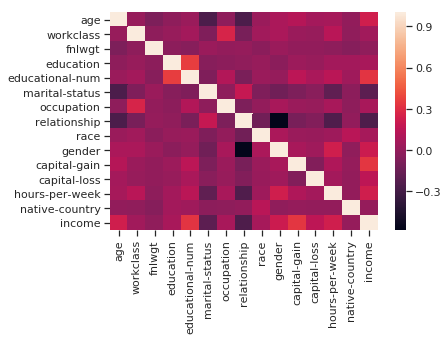

In [11]:
data.correlation()

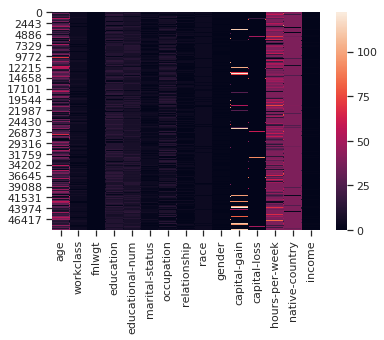

In [12]:
data.heatmap()

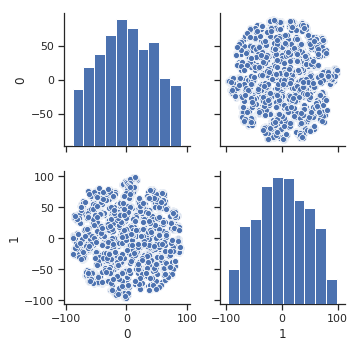

In [13]:
data.get_data('X_test').tsne().plot()

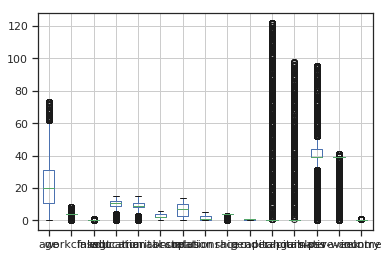

In [14]:
data.boxplot()

In [15]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,21.643585,3.870439,0.120004,10.288420,9.078089,2.618750,6.577700,1.443287,3.668052,0.668482,6.681504,2.234122,39.396728,36.749355,0.239282
std,13.710510,1.464234,0.071445,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,24.045927,10.894011,12.295271,7.775343,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,0.071216,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,0.112210,11.000000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,0.152462,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,73.000000,8.000000,1.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,122.000000,98.000000,95.000000,41.000000,1.000000


In [20]:
# debug coloration
#import seaborn as sns
#sns.pairplot(data, hue='income')
#data.plot(data, hue='income')

# Benchmark

In [45]:
data.score()

0.8500546000546001

In [18]:
data.set_class('income')
data.score()

0.8533988533988534

Call auto-sklearn

In [ ]:
#data.score(method='automatic')

Compute score with different metrics

In [ ]:
##

# Comparison

Two similar datasets (subsets of the same distribution)

In [19]:
ad1 = ad.read_csv('data/squares1.csv', sep=None, engine='python')
ad2 = ad.read_csv('data/squares2.csv', sep=None, engine='python')

Different distance metrics between datasets

In [21]:
ad1.distance(ad2)

0.030682281880527684

Overlay plot

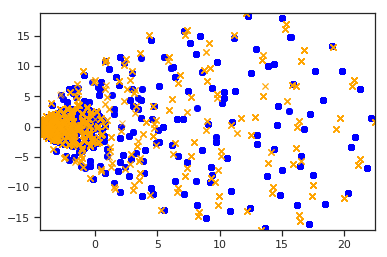

In [41]:
pca1 = ad1.pca(n_components=2)
pca2 = ad2.pca(n_components=2)
pca1.plot(ad=pca2)

# Generation?